In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class pvi:

    # ponto inicial: tupla, representa (x0, y0). ex: (0,0)
    # passo: float
    # intervalo: tupla, representa (x0, xn). ex: (0)
        # x0 no intervalo deve corresponder a x0 do ponto inicial
        # se não corresponderem, será considerado x0 passado no ponto inicial
    # equacao: string, representa a equacao. ex: 'x**2 + y**2', 'np.sin(x)'
        # deve ser usadas as variáveis x e y na notação

    def __init__(self, ponto_inicial, passo, intervalo, equacao):
        self.x0, self.y0 = ponto_inicial
        self.h = passo
        self.xn = intervalo[1]
        self.equacao = equacao

        if self.x0 != intervalo[0]:
            print("Verifique o ponto inicial e o intervalo de integração.")

    def __str__(self):
        string = f"ponto inicial: ({self.x0}, {self.y0})\n"
        string += f"passo: {self.h}\n"
        string += f"intervalo: ({self.x0}, {self.xn})\n"
        string += f"equacao: {self.equacao}"
        return string
    
    def __repr__(self):
        return self.__str__()

In [3]:
# Resolve o PVI com o método de Euler
# Retorna uma lista de pontos da função

def euler(pvi):
    x = pvi.x0
    y = pvi.y0
    h = pvi.h
    xn = pvi.xn
    equacao = pvi.equacao
    pontos = [(pvi.x0, pvi.y0)]

    while x <= xn:
        y = y + h*eval(equacao)
        x = x + h
        pontos.append((x,y))
    
    return pontos

In [8]:
def plotar(pontos):
    x_ex = [ponto[0] for ponto in pontos]
    y_ex = [ponto[1] for ponto in pontos]

    plt.plot(x_ex, y_ex, 'o-')
    plt.show()

In [6]:
pi_ex = (0,2)
h_ex = 0.1
inter_ex = (0, 0.3)
eq_ex = '-2*(x**2)*y**2'

pvi_ex = pvi(pi_ex, h_ex, inter_ex, eq_ex)
pontos_ex = euler(pvi_ex)

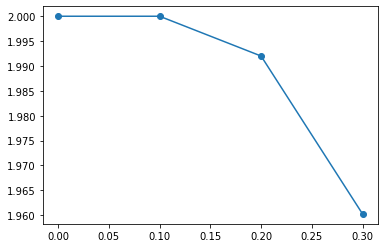

In [9]:
plotar(pontos_ex)